# ***循环神经网络RNN***

# 1. 序列模型

① 序列模型能够应用在许多领域，例如：

 - 语音识别
 - 音乐发生器
 - 情感分类
 - DNA序列分析 
 - 机器翻译
 - 视频动作识别
 - 命名实体识别

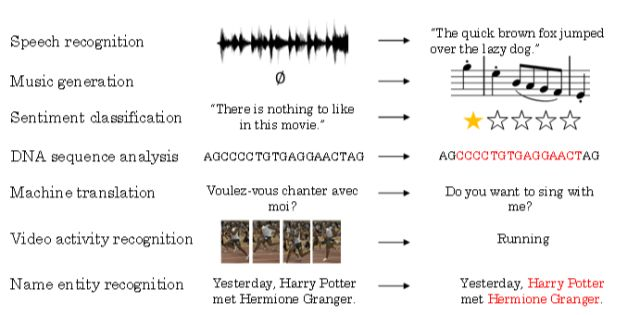

② 这些序列模型基本都属于监督式学习，但输入x和输出y不一定都是序列模型。

③ 如果都是序列模型的话，模型长度也不一定完全一致。

# 2. 命名实体识别

① 下面以命名实体识别为例，介绍序列模型的命名规则，示例语句为：
 
 - Harry Potter and Hermione Granger invented a new spell.

② 该句话包含9个单词，输出y即为1 x 9向量，每位表征对应单词是否为人名的一部分，1表示是，0表示否。

③ 很明显，该句话中“Harry”， “Potter”， “Hermione”， “Granger”均是人名成分，所以，对应的输出y可表示为：

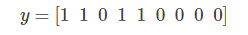

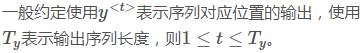

④ 对于输入x，表示为：

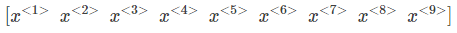

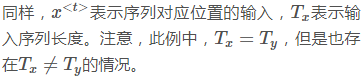

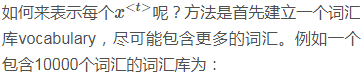

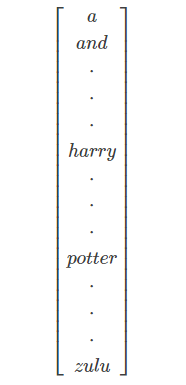

⑤ 该词汇库可看成是 10000 x 1 的向量。值得注意的是自然语言处理NLP实际应用中的词汇库可达百万级别的词汇量。

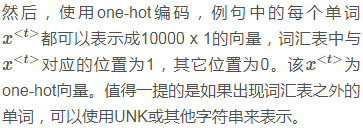

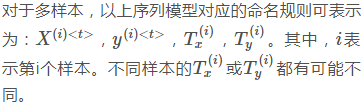

# 3. 循环神经网络

① 对于序列模型，如果使用标准的神经网络，其模型结构如下：

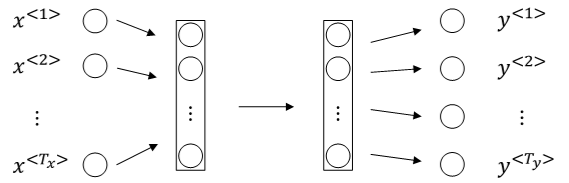

② 使用标准的神经网络模型存在两个问题：

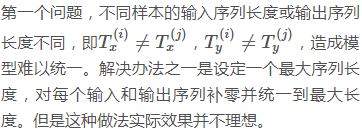

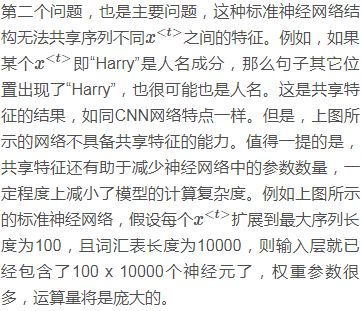

③ 标准的神经网络不适合解决序列模型问题，而循环神经网络（RNN）是专门用来解决序列模型问题的。

① RNN模型结构如下：

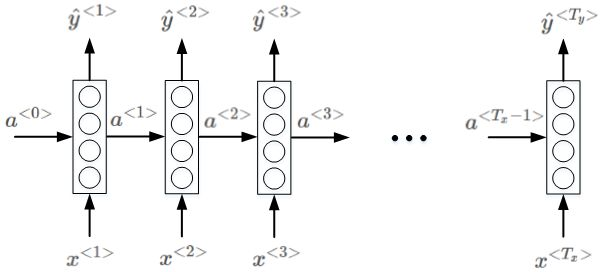

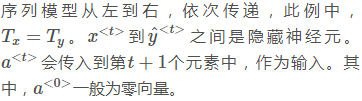

② RNN模型包含三类权重系数，分别是Wax，Waa，Wya。且不同元素之间同一位置共享同一权重系数。

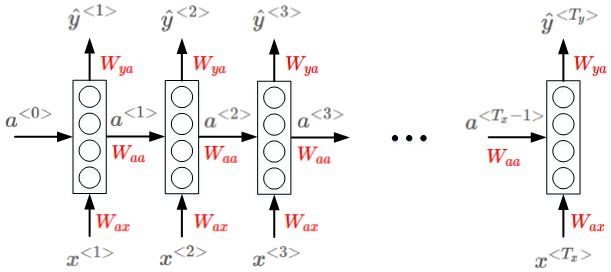

③ RNN的正向传播（Forward Propagation）过程为：

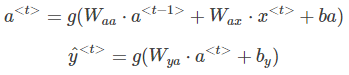

④ 其中，g(⋅)表示激活函数，不同的问题需要使用不同的激活函数。

⑤ 为了简化表达式，可以对上式进行整合：

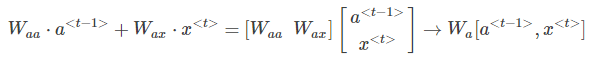

⑥ 则正向传播可表示为：

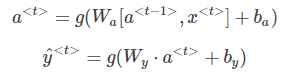

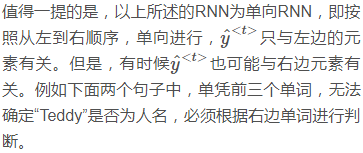

 - He said, “Teddy Roosevelt was a great President.”

 - He said, “Teddy bears are on sale!”

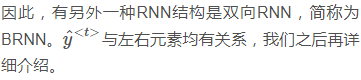

⑦ 针对上面识别人名的例子，经过RNN正向传播，单个元素的Loss function为：

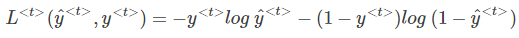

⑧ 该样本所有元素的Loss function为：

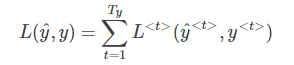

⑨ 然后，反向传播（Backpropagation）过程就是从右到左分别计算L(y^,y)对参数Wa，Wy，ba，by的偏导数。思路与做法与标准的神经网络是一样的。一般可以通过成熟的深度学习框架自动求导，例如PyTorch、Tensorflow等。

⑩ 这种从右到左的求导过程被称为Backpropagation through time。

# 4. 不同种类RNN

① 以上介绍的例子中，Tx=Ty。但是在很多RNN模型中，Tx是不等于Ty的。

② 例如第1节介绍的许多模型都是Tx≠Ty。

③ 根据Tx与Ty的关系，RNN模型包含以下几个类型：

 - Many to many: Tx=TyTx=Ty
 - Many to many: Tx≠TyTx≠Ty
 - Many to one: Tx>1,Ty=1Tx>1,Ty=1
 - One to many: Tx=1,Ty>1Tx=1,Ty>1
 - One to one: Tx=1,Ty=1Tx=1,Ty=1

④ 不同类型相应的示例结构如下：

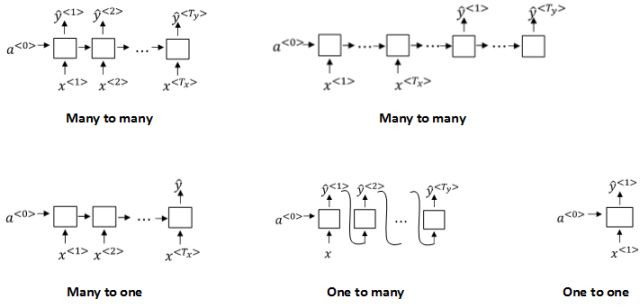

# 5. 语言模型和序列生成

① 语言模型是自然语言处理（NLP）中最基本和最重要的任务之一。

② 使用RNN能够很好地建立需要的不同语言风格的语言模型。

① 什么是语言模型呢？举个例子，在语音识别中，某句语音有两种翻译：

 - The apple and pair salad.
 - The apple and pear salad.
 
② 很明显，第二句话更有可能是正确的翻译。

③ 语言模型实际上会计算出这两句话各自的出现概率。比如第一句话概率为10^−13，第二句话概率为10^−10。

④ 也就是说，利用语言模型得到各自语句的概率，选择概率最大的语句作为正确的翻译。

⑤ 概率计算的表达式为：

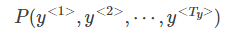

① 如何使用RNN构建语言模型？

② 首先，我们需要一个足够大的训练集，训练集由大量的单词语句语料库（corpus）构成。

③ 然后，对corpus的每句话进行切分词（tokenize）。做法就跟第2节介绍的一样，建立vocabulary，对每个单词进行one-hot编码。

④ 例如下面这句话：
 - The Egyptian Mau is a bread of cat.

① One-hot编码已经介绍过了，不再赘述。

② 还需注意的是，每句话结束末尾，需要加上< EOS >作为语句结束符。

③ 另外，若语句中有词汇表中没有的单词，用< UNK >表示。假设单词“Mau”不在词汇表中，则上面这句话可表示为：

 - The Egyptian < UNK > is a bread of cat. < EOS >

④ 准备好训练集并对语料库进行切分词等处理之后，接下来构建相应的RNN模型。

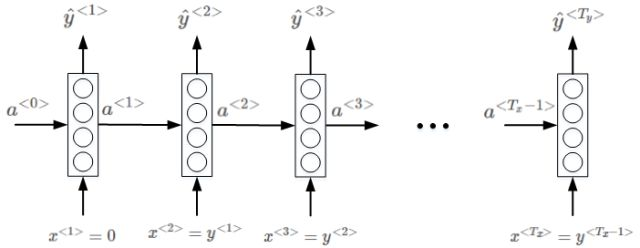

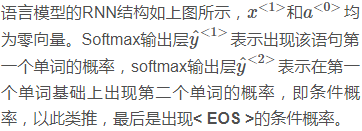

① 单个元素的softmax loss function为：

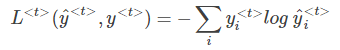

② 该样本所有元素的Loss function为：

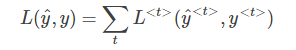

③ 对语料库的每条语句进行RNN模型训练，最终得到的模型可以根据给出语句的前几个单词预测其余部分，将语句补充完整。

④ 例如给出“Cats average 15”，RNN模型可能预测完整的语句是“Cats average 15 hours of sleep a day.”。

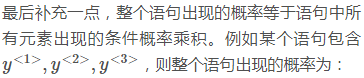

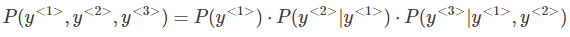

# 6. 序列采样

① 利用训练好的RNN语言模型，可以进行新的序列采样，从而随机产生新的语句。

② 与上一节介绍的一样，相应的RNN模型如下所示：

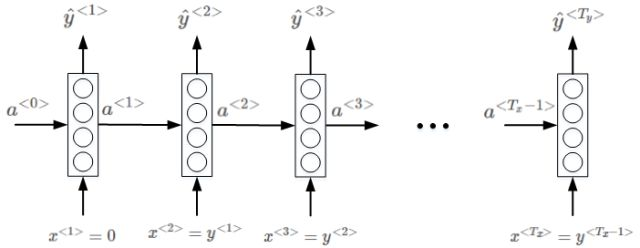

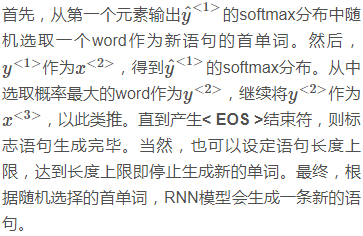

③ 值得一提的是，如果不希望新的语句中包含< UNK >标志符，可以在每次产生< UNK >时重新采样，直到生成非< UNK >标志符为止。

① 以上介绍的是word level RNN，即每次生成单个word，语句由多个words构成。

② 另外一种情况是character level RNN，即词汇表由单个英文字母或字符组成，如下所示：

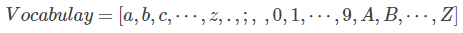

③ Character level RNN与word level RNN不同的是，y^<t>由单个字符组成而不是word。训练集中的每句话都当成是由许多字符组成的。
    
④ character level RNN的优点是能有效避免遇到词汇表中不存在的单词< UNK >。
    
⑤ 但是，character level RNN的缺点也很突出。由于是字符表征，每句话的字符数量很大，这种大的跨度不利于寻找语句前部分和后部分之间的依赖性。另外，character level RNN的在训练时的计算量也是庞大的。
    
⑥ 基于这些缺点，目前character level RNN的应用并不广泛，但是在特定应用下仍然有发展的趋势。

# 7. RNNs 梯度消失和爆炸

① 语句中可能存在跨度很大的依赖关系，即某个word可能与它距离较远的某个word具有强依赖关系。例如下面这两条语句：

 - The cat, which already ate fish, was full.
 - The cats, which already ate fish, were full.
 
② 第一句话中，was受cat影响；第二句话中，were受cats影响。它们之间都跨越了很多单词。

③ 而一般的RNN模型每个元素受其周围附近的影响较大，难以建立跨度较大的依赖性。

④ 上面两句话的这种依赖关系，由于跨度很大，普通的RNN网络容易出现梯度消失，捕捉不到它们之间的依赖，造成语法错误。

⑤ 另一方面，RNN也可能出现梯度爆炸的问题，即gradient过大。

⑥ 常用的解决办法是设定一个阈值，一旦梯度最大值达到这个阈值，就对整个梯度向量进行尺度缩小。这种做法被称为gradient clipping。

# 8. GRU

① RNN的隐藏层单元结构如下图所示：

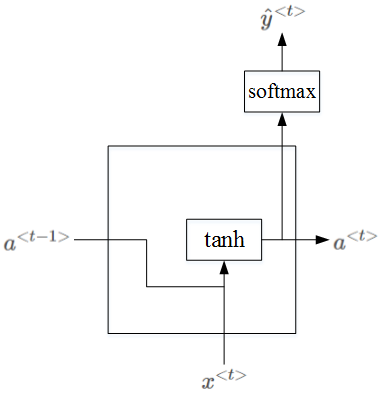

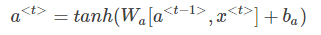

② 为了解决梯度消失问题，对上述单元进行修改，添加了记忆单元，构建GRU，如下图所示：

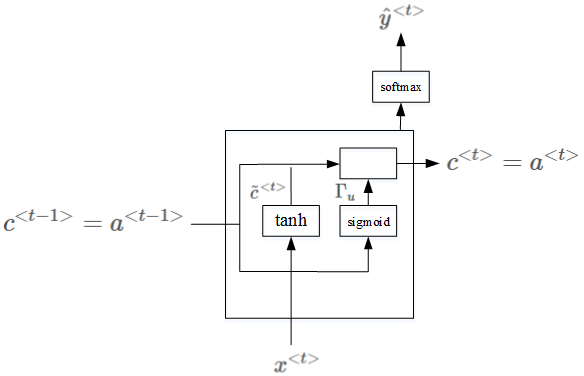

③ 相应的表达式为：

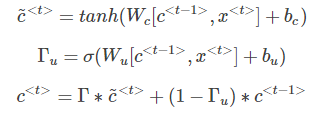

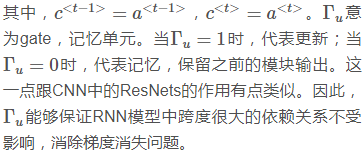

④ 上面介绍的是简化的GRU模型，完整的GRU添加了另外一个gate，即Γr，表达式如下：

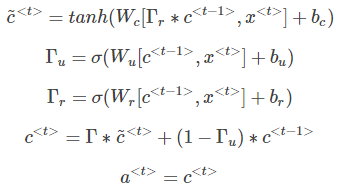

⑤ 注意，以上表达式中的∗表示元素相乘，而非矩阵相乘。

# 9. LSTM

① LSTM是另一种更强大的解决梯度消失问题的方法。它对应的RNN隐藏层单元结构如下图所示：

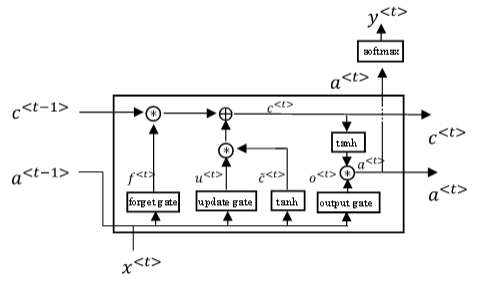

② 相应的表达式为：

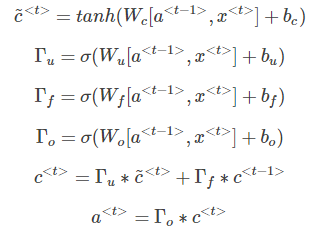

③ LSTM包含三个gates：Γu，Γf，Γo，分别对应update gate，forget gate和output gate。

④ 如果考虑$c^{<t−1>}$对Γu，Γf，Γo的影响，可加入peephole connection，对LSTM的表达式进行修改：

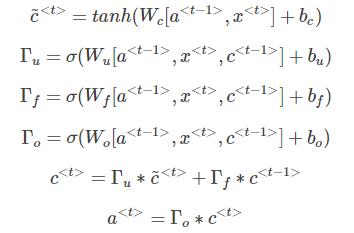

⑤ GRU可以看成是简化的LSTM，两种方法都具有各自的优势。

# 10. Bidirectional RNN

① 我们在前面简单提过Bidirectional RNN，它的结构如下图所示：

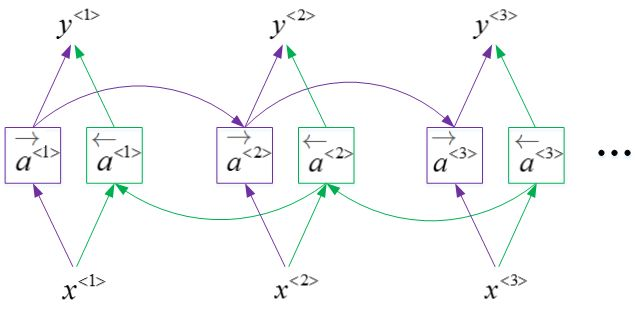

② BRNN对应的输出表达式为：

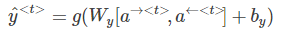

③ BRNN能够同时对序列进行双向处理，性能大大提高。

④ 但是计算量较大，且在处理实时语音时，需要等到完整的一句话结束时才能进行分析。

# 11. Deep RNNs

① Deep RNNs由多层RNN组成，其结构如下图所示。

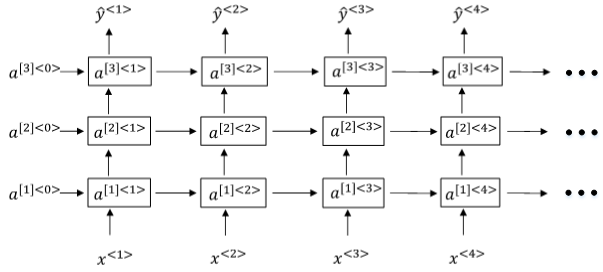

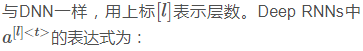

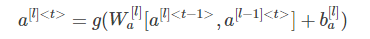

② 我们知道DNN层数可达100多，而Deep RNNs一般没有那么多层，3层RNNs已经较复杂了。

③ 另外一种Deep RNNs结构是每个输出层上还有一些垂直单元，如下图所示。

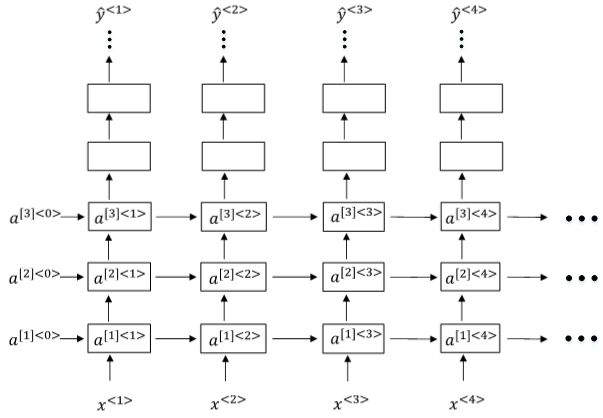